## Demonstrate data processing functionality

### Generate test images

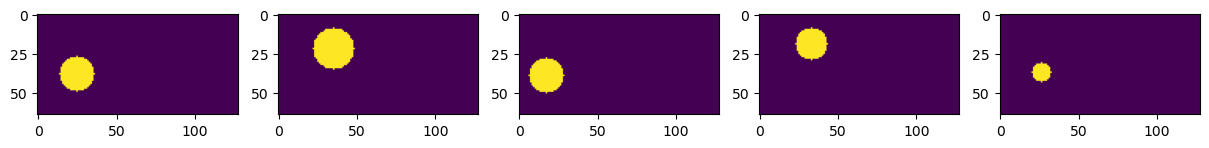

In [1]:
import numpy as np

import matplotlib.pyplot as plt

def generate_circle_images(num_images=10, image_size=64, min_radius=5, max_radius=15):
    images = []
    center_margin = image_size // 4  # restrict centers to the central region
    center_min = center_margin
    center_max = image_size - center_margin
    for _ in range(num_images):
        img = np.zeros((image_size, image_size*2), dtype=np.float32)
        for _ in range(1):
            radius = np.random.randint(min_radius, max_radius)
            x_center = np.random.randint(center_min, center_max)
            y_center = np.random.randint(center_min, center_max)
            y, x = np.ogrid[:image_size, :image_size*2]
            mask = (x - x_center)**2 + (y - y_center)**2 <= radius**2
            img[mask] = 1.0
        images.append(img)
    return images

# Example usage and visualization
images = generate_circle_images(num_images=5, image_size=64)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, img in zip(axs, images):
    ax.imshow(img)


### Define function to get the centroid and RMS size

In [6]:
from skimage.feature import blob_log

def find_circle_centroid(img):
    """
    Finds the centroid and RMS size of the circle in a single image using scikit-image's blob_log.
    Args:
        img (np.ndarray): 2D numpy array representing an image.
    Returns:
        tuple: (y, x, rms_size) centroid coordinates and RMS size, or (None, None, None) if not found.
    """
    blobs = blob_log(img, min_sigma=3, max_sigma=100, num_sigma=50, threshold=0.5)
    if len(blobs) == 0:
        return (None, None, None)
    x, y, sigma = blobs[0]
    rms_size = sigma * np.sqrt(2)
    return rms_size, np.array((x, y))

centroids = []
for img in images:
    centroids.append(find_circle_centroid(img)[1])
print(centroids)


[array([38., 25.], dtype=float32), array([22., 35.], dtype=float32), array([39., 17.], dtype=float32), array([19., 33.], dtype=float32), array([37., 26.], dtype=float32)]


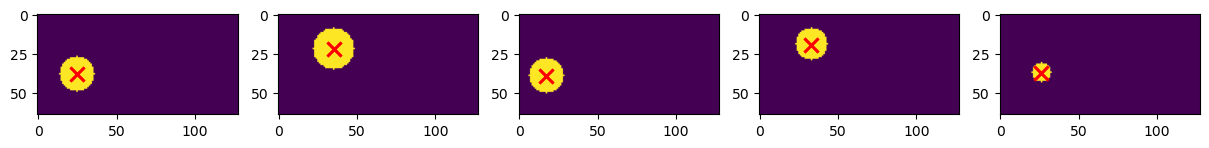

In [7]:
# Overlay centroid locations on the image plots
for ax, centroid in zip(axs, centroids):
    x, y = centroid
    if y is not None and x is not None:
        ax.plot(y,x, 'rx', markersize=10, markeredgewidth=2)
fig

### Process images without centering

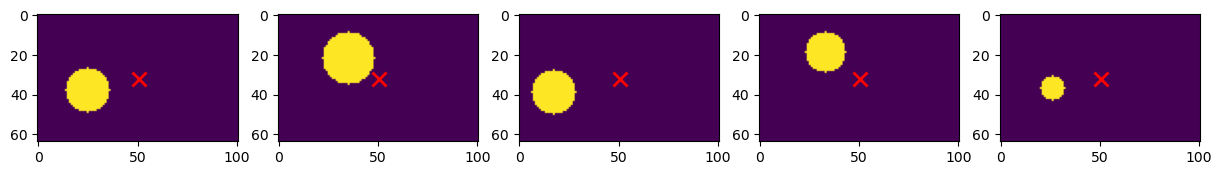

In [ ]:
## use process images
from gpsr.data_processing import process_images
processed_images, mesh = process_images(np.array(images), screen_resolution=1.0, image_fitter=find_circle_centroid)

# Show the processed images
img_size = processed_images[0].shape
fig2, axs2 = plt.subplots(1, len(processed_images), figsize=(15, 3))
for ax, img in zip(axs2, processed_images):
    ax.imshow(img)
    ax.plot(img_size[1] / 2, img_size[0]/2, 'rx', markersize=10, markeredgewidth=2)


### Process images with centering

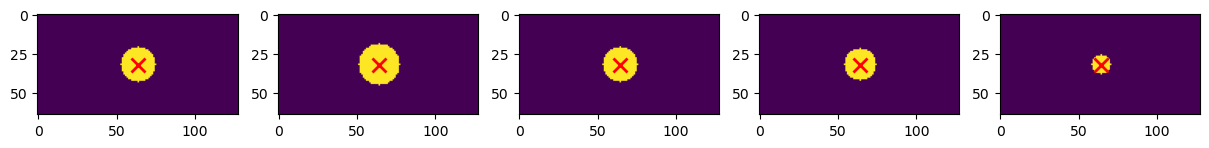

In [14]:
## use process images
from gpsr.data_processing import process_images
processed_images, mesh = process_images(np.array(images), screen_resolution=1.0, image_fitter=find_circle_centroid, center_images=True)

# Show the processed images
img_size = processed_images[0].shape
fig2, axs2 = plt.subplots(1, len(processed_images), figsize=(15, 3))
for ax, img in zip(axs2, processed_images):
    ax.imshow(img)
    ax.plot(img_size[1] / 2, img_size[0]/2, 'rx', markersize=10, markeredgewidth=2)
